# Give Me Some Credit

The aim of this project is to improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. The goal of this project is to help build a model that borrowers can use to help make the best financial decisions. Historical data are provided on 250,000 borrowers.

# Downloadin The Dataset

In [2]:
import jovian

In [3]:
jovian.commit(project='Machine leanring course project', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "telvinmw/machine-leanring-course-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/telvinmw/machine-leanring-course-project


'https://jovian.ai/telvinmw/machine-leanring-course-project'

In [4]:
import opendatasets as od
import os

In [5]:
od.download("https://www.kaggle.com/c/GiveMeSomeCredit/data")

Skipping, found downloaded files in ".\GiveMeSomeCredit" (use force=True to force download)


In [6]:
os.listdir('GiveMeSomeCredit')

['cs-test.csv', 'cs-training.csv', 'Data Dictionary.xls', 'sampleEntry.csv']

In [7]:
import pandas as pd

In [8]:
credit_train_df = pd.read_csv('GiveMeSomeCredit/cs-training.csv', error_bad_lines = False)

In [9]:
credit_train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Exploratory Data Analysis

In [10]:
credit_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [11]:
credit_train_df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

heatmap for null values

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Credit training data null values'}>

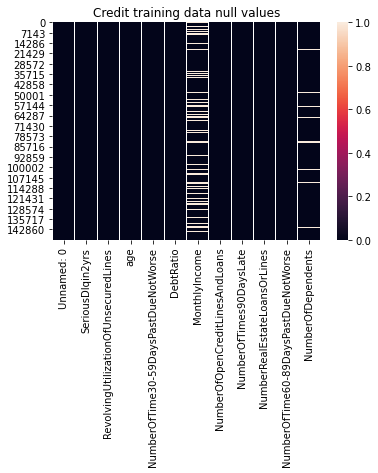

In [13]:
plt.title("Credit training data null values")
sns.heatmap(credit_train_df.isna())

In [14]:
credit_train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


A joint plot of age and monthly income

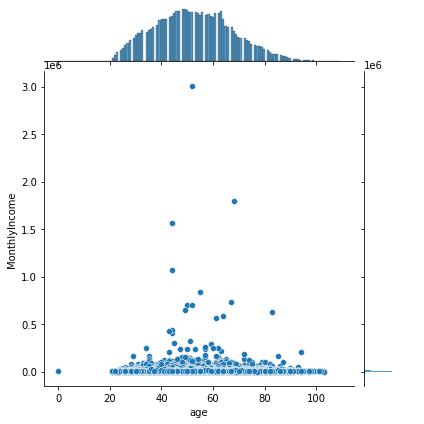

In [15]:
sns.jointplot(data = credit_train_df, x = "age", y = "MonthlyIncome")

An histogram of the distribution

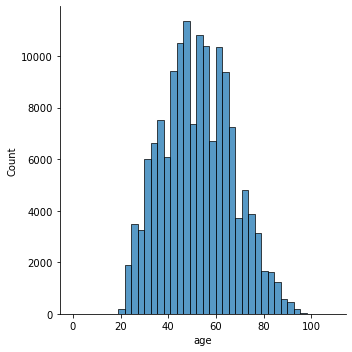

In [16]:
sns.displot(credit_train_df['age'].dropna(),kde=False, bins=40)

In [17]:
credit_train_df.corr()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002632,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,0.002632,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684


Text(0.5, 1.0, 'Credit train data correlation')

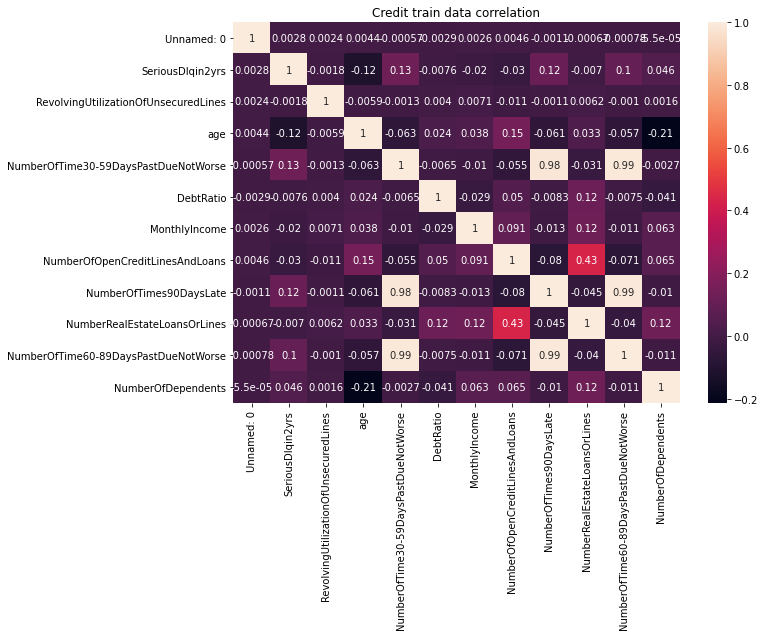

In [18]:
plt.figure(figsize = (10,7))

sns.heatmap(credit_train_df.corr(), annot = True)
plt.title("Credit train data correlation")

# Input and Target columns

In [19]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

target_col = 'SeriousDlqin2yrs'

In [20]:
inputs_df = credit_train_df[input_cols].copy()
targets = credit_train_df[target_col].copy()

# Machine Learning Model

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [22]:
# Identify numeric and categorical columns

In [23]:
numeric_cols = credit_train_df[input_cols].select_dtypes(include=np.number).columns.tolist()

In [24]:
print(numeric_cols)

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [25]:
# Impute and scale numeric columns

In [26]:
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [27]:
inputs_df.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols], targets, test_size=0.25, random_state=42)

# Training and Visualizing the Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree = DecisionTreeClassifier(random_state=42)

In [31]:
tree.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
train_preds = tree.predict(train_inputs)

In [34]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
pd.value_counts(train_preds)

0    104982
1      7518
dtype: int64

The probabilities for each prediction.

In [36]:
train_probs = tree.predict_proba(train_inputs)

In [37]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Checking the accuracy of the prediction

In [38]:
accuracy_score(train_targets, train_preds)

0.9996888888888888

checking for validation

In [39]:
tree.score(val_inputs, val_targets)

0.8976

In [40]:
val_targets.value_counts() / len(val_targets)

0    0.934
1    0.066
Name: SeriousDlqin2yrs, dtype: float64

In [45]:
confusion_matrix(train_targets, train_preds)

array([[104948,      1],
       [    34,   7517]], dtype=int64)

<AxesSubplot:>

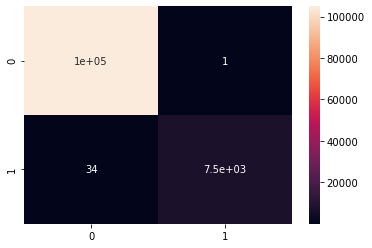

In [48]:
sns.heatmap(confusion_matrix(train_targets, train_preds), annot = True)

In [49]:
print("classification_report")
print(classification_report(train_targets, train_preds))

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104949
           1       1.00      1.00      1.00      7551

    accuracy                           1.00    112500
   macro avg       1.00      1.00      1.00    112500
weighted avg       1.00      1.00      1.00    112500



### Visualization

We can visualize the decision tree _learned_ from the training data.

In [50]:
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

[Text(837.0, 733.86, 'NumberOfTimes90DaysLate <= 0.005\ngini = 0.125\nsamples = 112500\nvalue = [104949, 7551]'),
 Text(418.5, 570.78, 'NumberOfTime60-89DaysPastDueNotWorse <= 0.005\ngini = 0.088\nsamples = 106235\nvalue = [101316, 4919]'),
 Text(209.25, 407.70000000000005, 'NumberOfTime30-59DaysPastDueNotWorse <= 0.005\ngini = 0.075\nsamples = 102604\nvalue = [98617, 3987]'),
 Text(104.625, 244.62, 'age <= 0.491\ngini = 0.053\nsamples = 89631\nvalue = [87200, 2431]'),
 Text(52.3125, 81.54000000000008, '\n  (...)  \n'),
 Text(156.9375, 81.54000000000008, '\n  (...)  \n'),
 Text(313.875, 244.62, 'NumberOfTime30-59DaysPastDueNotWorse <= 0.015\ngini = 0.211\nsamples = 12973\nvalue = [11417, 1556]'),
 Text(261.5625, 81.54000000000008, '\n  (...)  \n'),
 Text(366.1875, 81.54000000000008, '\n  (...)  \n'),
 Text(627.75, 407.70000000000005, 'NumberOfTime30-59DaysPastDueNotWorse <= 0.015\ngini = 0.382\nsamples = 3631\nvalue = [2699, 932]'),
 Text(523.125, 244.62, 'NumberOfTime60-89DaysPastDueN

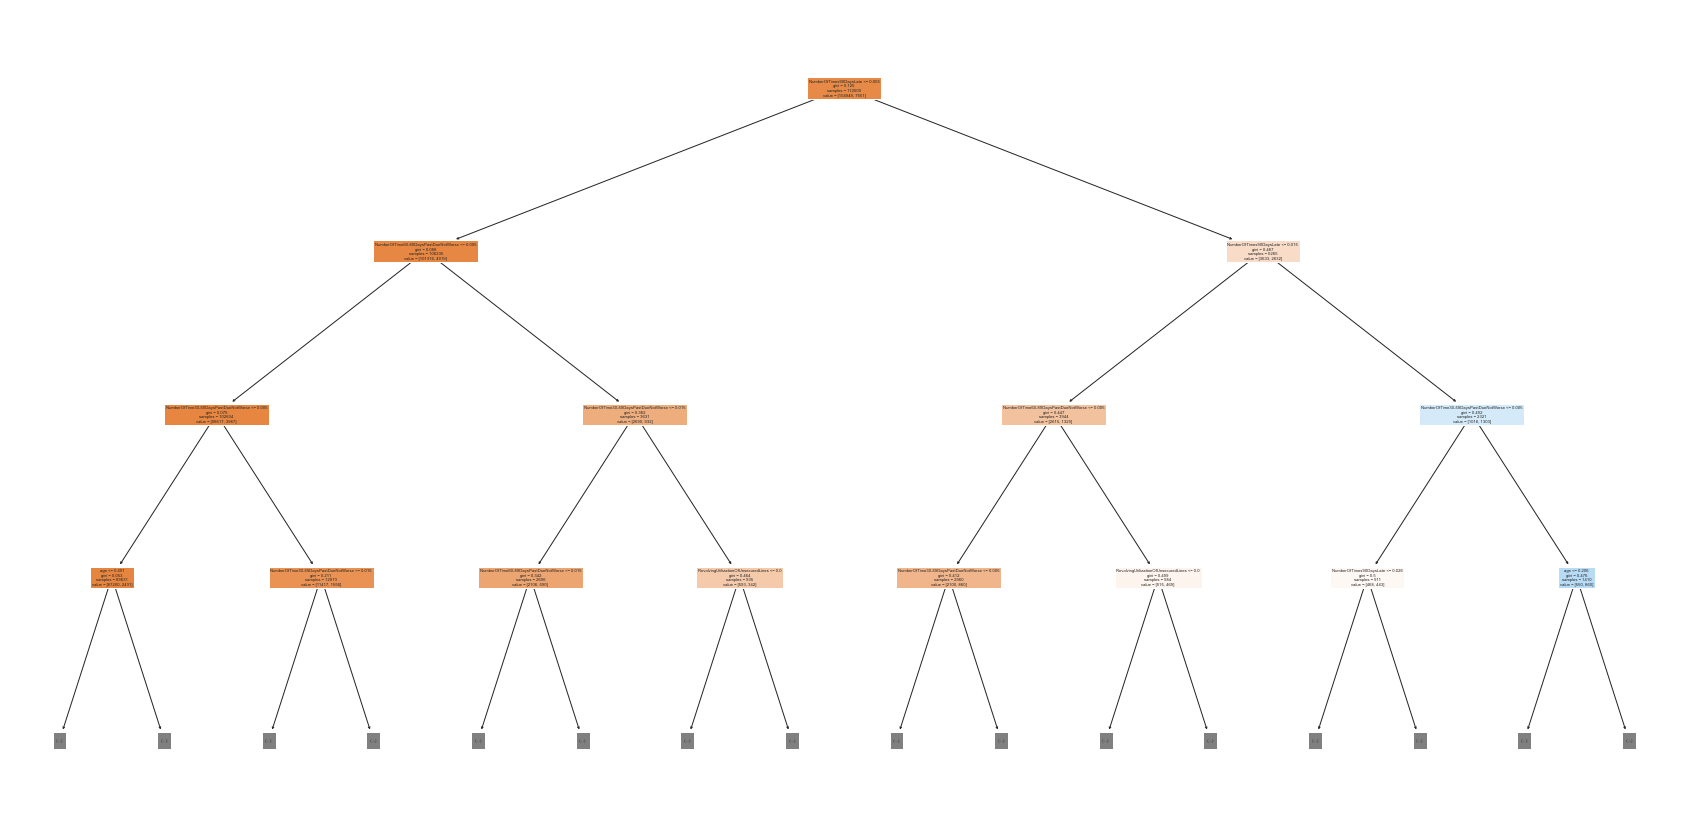

In [51]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree

plot_tree(tree, feature_names = train_inputs.columns, max_depth=3, filled=True)

In [52]:
from sklearn.tree import plot_tree, export_text

In [53]:
# Visualize the tree textually using export_text

tree_text = export_text(tree, max_depth=10, feature_names=list(inputs_df.columns))

In [54]:
# Display the first few lines
print(tree_text[:2000])

|--- NumberOfTimes90DaysLate <= 0.01
|   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.01
|   |   |   |--- age <= 0.49
|   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.01
|   |   |   |   |   |--- age <= 0.24
|   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |   |--- age <= 0.22
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  0.22
|   |   |   |   |   |   |   |   |   |--- age <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- age >  0.22
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- MonthlyI

In [55]:
# Check feature importance
model_importances = tree.feature_importances_

In [56]:
model_importance_df = pd.DataFrame({
    "feature" : train_inputs.columns,
    "importance": model_importances    
}).sort_values( "importance", ascending = False)

In [57]:
model_importance_df

,feature,importance
4,MonthlyIncome,0.196497
0,RevolvingUtilizationOfUnsecuredLines,0.152443
3,DebtRatio,0.141088
1,age,0.139371
6,NumberOfTimes90DaysLate,0.131972
5,NumberOfOpenCreditLinesAndLoans,0.090962
9,NumberOfDependents,0.045070
2,NumberOfTime30-59DaysPastDueNotWorse,0.035043
8,NumberOfTime60-89DaysPastDueNotWorse,0.034328
7,NumberRealEstateLoansOrLines,0.033226


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='importance', ylabel='feature'>

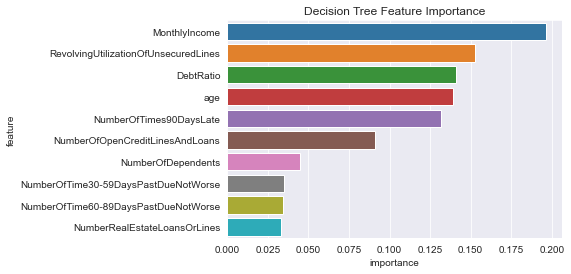

In [58]:
plt.title("Decision Tree Feature Importance")
sns.barplot(data = model_importance_df.head(10), x = "importance", y = "feature")

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

Creating the model

In [60]:
rf1 = RandomForestClassifier()

fitting the model

In [61]:
rf1.fit(train_inputs, train_targets)

RandomForestClassifier()

In [62]:
rf1_train_preds = rf1.predict(train_inputs)

In [63]:
rf1.score(train_inputs, train_targets)

0.9986488888888889

In [64]:
rf1.score(val_inputs, val_targets)

0.9360533333333333

In [65]:
rf1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

In [66]:
rf1_importance_df

,feature,importance
4,MonthlyIncome,0.171441
0,RevolvingUtilizationOfUnsecuredLines,0.166137
1,age,0.137672
3,DebtRatio,0.131654
6,NumberOfTimes90DaysLate,0.100981
5,NumberOfOpenCreditLinesAndLoans,0.099053
2,NumberOfTime30-59DaysPastDueNotWorse,0.055616
8,NumberOfTime60-89DaysPastDueNotWorse,0.053468
9,NumberOfDependents,0.046393
7,NumberRealEstateLoansOrLines,0.037587


<AxesSubplot:title={'center':'Random Forest Feature Importance'}, xlabel='importance', ylabel='feature'>

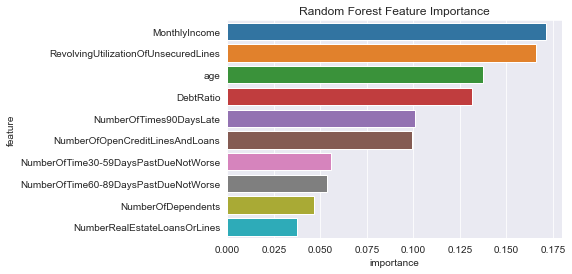

In [67]:
plt.title("Random Forest Feature Importance")
sns.barplot(data=rf1_importance_df.head(10), x='importance', y='feature')

# Training The Best Model

In [68]:
# Create the model with custom hyperparameters


rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [69]:
#Train the model

rf2.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [70]:
rf2_train_preds = rf2.predict(train_inputs)

In [71]:
rf2_val_preds = rf2.predict(val_inputs)

In [72]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [73]:
rf2_importance_df

,feature,importance
4,MonthlyIncome,0.170722
0,RevolvingUtilizationOfUnsecuredLines,0.165056
1,age,0.137682
3,DebtRatio,0.132106
6,NumberOfTimes90DaysLate,0.105255
5,NumberOfOpenCreditLinesAndLoans,0.099746
2,NumberOfTime30-59DaysPastDueNotWorse,0.056110
8,NumberOfTime60-89DaysPastDueNotWorse,0.048992
9,NumberOfDependents,0.046675
7,NumberRealEstateLoansOrLines,0.037657


<AxesSubplot:xlabel='importance', ylabel='feature'>

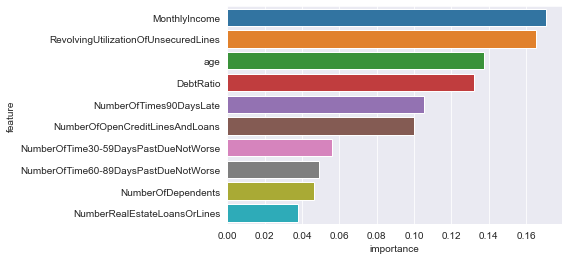

In [74]:
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature')

# Making Predictions on the Test Set

In [75]:
credit_test_df = pd.read_csv('GiveMeSomeCredit/cs-test.csv')

In [76]:
credit_test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [77]:
credit_test_df[numeric_cols] = imputer.transform(credit_test_df[numeric_cols])
credit_test_df[numeric_cols] = scaler.transform(credit_test_df[numeric_cols])

In [78]:
test_inputs = credit_test_df[numeric_cols]

In [79]:
test_inputs[numeric_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [80]:
test_preds = rf2.predict(test_inputs)

In [81]:
submission_df = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv')

In [82]:
submission_df.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


Let's replace the values of the Probability column with our predictions.

In [83]:
submission_df['Probability'] = test_preds

Let's save it as a CSV file and download it.

In [84]:
submission_df.to_csv('submission.csv', index=False)

In [85]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

C:\Users\Telvin\submission.csv

# Data Source:
    
[1] https://www.kaggle.com/c/GiveMeSomeCredit/overview    